# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [2]:
import pandas as pd
import seaborn as sns
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
sorted_data = student_data.sort_values(by=['Age'])
sorted_data

,Age,Tardies
0,17,10
6,19,9
3,21,9
7,26,6
2,27,5
9,30,3
4,36,4
5,48,2
1,51,1
8,54,0


Draw a dispersion diagram (scatter plot) for the data.

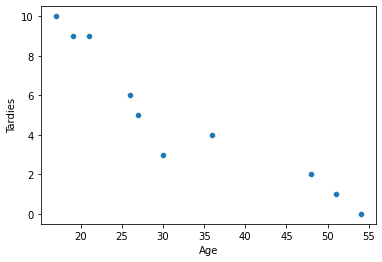

In [19]:

ax = sns.scatterplot(data=sorted_data, x="Age", y="Tardies")


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

The more we are old, the less we are late. There seems to be a linear relationship

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [21]:
sorted_data.corr() # Strong relationship between the two

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


In [22]:
sorted_data.cov()

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


In [25]:
sorted_data.describe()

,Age,Tardies
count,10.000000,10.000000
mean,32.900000,4.900000
std,13.698743,3.541814
min,17.000000,0.000000
25%,22.250000,2.250000
50%,28.500000,4.500000
75%,45.000000,8.250000
max,54.000000,10.000000


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [5]:
from scipy import stats
X = sorted_data['Age']
Y = sorted_data['Tardies']
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))
print ('The r_value**2 is: ' + str(r_value**2))

The slope is: -0.24282077091598084
The intercept is: 12.88880336313577
The r_value**2 is: 0.8820265558250112


In [6]:
from sklearn import linear_model
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

regr = linear_model.LinearRegression()
x = X.values.reshape(-1, 1)
y = Y.values.reshape(-1, 1)
regr.fit(x, y)

LinearRegression()

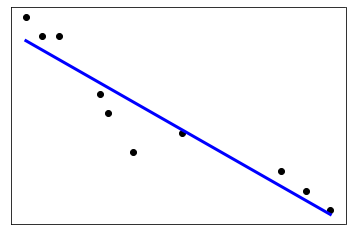

In [7]:
# plot it as in the example at http://scikit-learn.org/
plt.scatter(x, y,  color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()


In [11]:
#RMS - root mean square
((y-regr.predict(x))**2).mean()**0.5

1.1540884648655088

In [ ]:
list(X).reshape(-1,1)

Plot your regression model on your scatter plot.

<AxesSubplot:xlabel='Age', ylabel='Tardies'>

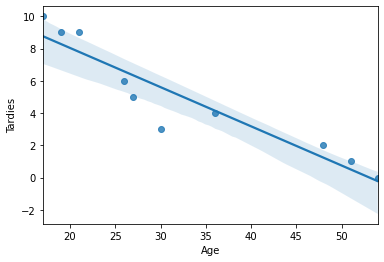

In [27]:
sns.regplot(x="Age", y="Tardies", data=sorted_data)

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [3]:
Good predictor : correlation almost to one, fit near the 

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [14]:
vehicles = pd.read_csv('vehicles.csv')
vehicles.head(2)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [53]:
vehicles[['Year', 'Cylinders','Fuel Barrels/Year','Combined MPG', 'Fuel Cost/Year']].corrwith(vehicles['CO2 Emission Grams/Mile'])

Year                -0.222300
Cylinders            0.752393
Fuel Barrels/Year    0.986189
Combined MPG        -0.926229
Fuel Cost/Year       0.930865
dtype: float64

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

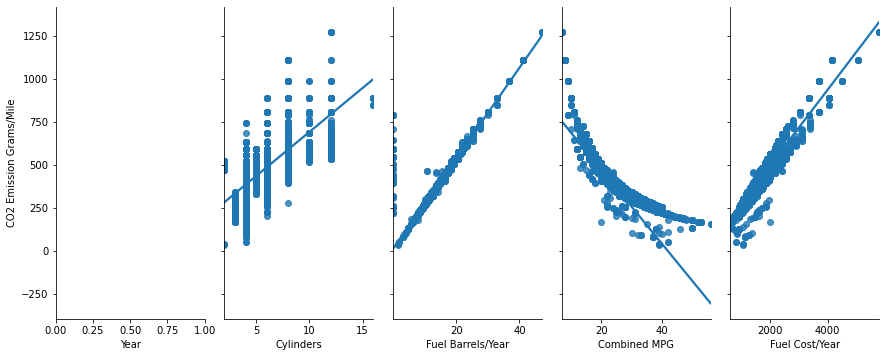

In [63]:
x=['Year', 'Cylinders','Fuel Barrels/Year','Combined MPG', 'Fuel Cost/Year']
y=['CO2 Emission Grams/Mile']

sns.pairplot(vehicles, x_vars=x, y_vars=y, height=5, aspect=.5, kind="reg");

In [16]:
import statsmodels.api as sm
variables = sm.add_constant(vehicles[['Year', 'Cylinders','Fuel Barrels/Year','Combined MPG', 'Fuel Cost/Year']])
outcome = vehicles['CO2 Emission Grams/Mile']
model = sm.OLS(outcome,variables)
results = model.fit()
predictions = results.predict(variables)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Wed, 12 May 2021   Prob (F-statistic):               0.00
Time:                             19:10:30   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               769.8883     19.392     39.702      0.000     731.880     807.897
Year                 -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders             1.8788      0.083     22.598      0.000       1.716       2.042
Fuel Barrels/Year    19.0529      0.061    311.600      0.000      18.933      19.173
Combined MPG         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
Fuel Cost/Year        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# Your response here. 

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [17]:
party_people = pd.DataFrame({'People': [1,3,4,6,8,9,11,14], 'Attendees': [1,2,4,4,5,7,8,13]})
party_people['Absents'] = party_people['People'] - party_people['Attendees'] 
party_people

,People,Attendees,Absents
0,1,1,0
1,3,2,1
2,4,4,0
3,6,4,2
4,8,5,3
5,9,7,2
6,11,8,3
7,14,13,1


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

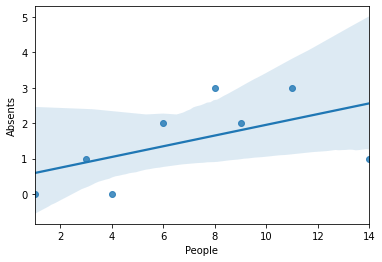

In [18]:
sorted_people = party_people.sort_values(by=['People'])
sorted_people
ax = sns.regplot(data=sorted_people, x="People", y="Absents")

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [19]:
from scipy import stats
X = sorted_people['People']
Y = sorted_people['Absents']
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))

The slope is: 0.15151515151515152
The intercept is: 0.43939393939393945


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

Outliers : When we have 4 people or 8 or 14 people

In [20]:
print(sorted_people)
sorted_people.corr()

   People  Attendees  Absents
0       1          1        0
1       3          2        1
2       4          4        0
3       6          4        2
4       8          5        3
5       9          7        2
6      11          8        3
7      14         13        1


,People,Attendees,Absents
People,1.000000,0.965230,0.550482
Attendees,0.965230,1.000000,0.313112
Absents,0.550482,0.313112,1.000000


In [21]:
cleaned_data = sorted_people.drop([2,4,7])
cleaned_data.corr()

,People,Attendees,Absents
People,1.000000,0.994132,0.957230
Attendees,0.994132,1.000000,0.920316
Absents,0.957230,0.920316,1.000000


In [22]:
X = sorted_people['People']
Y = sorted_people['Absents']
model = sm.OLS(Y,X)
results = model.fit()
predictions = results.predict(X)
print(predictions)
results.summary()

0    0.198473
1    0.595420
2    0.793893
3    1.190840
4    1.587786
5    1.786260
6    2.183206
7    2.778626
dtype: float64


/home/osboxes/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Absents   R-squared (uncentered):                   0.737
Model:                            OLS   Adj. R-squared (uncentered):              0.700
Method:                 Least Squares   F-statistic:                              19.63
Date:                Wed, 12 May 2021   Prob (F-statistic):                     0.00304
Time:                        19:18:26   Log-Likelihood:                         -11.017
No. Observations:                   8   AIC:                                      24.03
Df Residuals:                       7   BIC:                                      24.11
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
People         0.1985      0.045      4.431      0.003       0.093       0.304
==============================================================================
Omnibus:                        1.458   Durbin-Watson:                   1.803
Prob(Omnibus):                  0.482   Jarque-Bera (JB):                0.655
Skew:                          -0.664   Prob(JB):                        0.721
Kurtosis:                       2.547   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
X = cleaned_data['People']
Y = cleaned_data['Absents']
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))

The slope is: 0.2647058823529412
The intercept is: 0.0117647058823529


<AxesSubplot:xlabel='People', ylabel='Absents'>

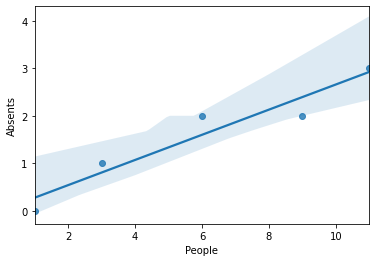

In [24]:
sns.regplot(data=cleaned_data, x="People", y="Absents")

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

We removed the outliers and increased the correlation

In [25]:
X = cleaned_data['People']
Y = cleaned_data['Absents']
model = sm.OLS(Y,X)
results = model.fit()
predictions = results.predict(X)
print(predictions)
results.summary()

0    0.266129
1    0.798387
3    1.596774
5    2.395161
6    2.927419
dtype: float64


/home/osboxes/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Absents   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              161.3
Date:                Wed, 12 May 2021   Prob (F-statistic):                    0.000221
Time:                        19:19:02   Log-Likelihood:                        -0.99285
No. Observations:                   5   AIC:                                      3.986
Df Residuals:                       4   BIC:                                      3.595
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
People         0.2661      0.021     12.702      0.000       0.208       0.324
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.562
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.462
Skew:                          -0.083   Prob(JB):                        0.794
Kurtosis:                       1.520   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""